# __Regularizacion en Modelos Lineales__ 

La mejor manera de reducir el sobreajuste en un modelo lineal es con la regularizacion. Este proceso consiste en restringir los pesos del modelo. Existen tres formas de restringir los pesos como veremos a continuacion:

# Regresion Ridge

Tambien llamada regularizacion de Tikhonov, es una version regularizada de la regresion lineal y consiste en agregar el termino $\alpha \sum_{i}^{n} w_{i}^2$ a la funcion de costo. Esto obliga al algoritmo de aprendizaje a no solo ajustar los datos, sino tambien a mantener los pesos del modelo los mas pequeno posible.

- Este termino solo debe agregarse a la funcion de costo durante el entrenamiento. Una vez entrenado, se evalua el rendimiento del modelo utilizando una medida no regularizada.

- Es comun que la funcion de costo usada durante el entrenamiento sea diferente de la medida de rendimiento del modelo.

- La funcion de costo utilizada en el entrenamiento debe tener derivadas amigables para la optimizacion mientras que la medida de rendimiento debe estar lo mas cerca posible del objetivo final.

- El parametro $\alpha$ controla cuanto desea regularizar el modelo. Si $\alpha=0$, la regresion Ridge se vuelve una regresion lineal. Si $\alpha$ es muy grande, todos los pesos terminan muy cerca de cero y el resultado es una linea plana que pasa por la media de los datos.

- Es importante escalar los datos con _StandarScaler_ antes de alicar la regularizacion ya que es sensible a la escala de las caracteristicas de entrada.

## Como funciona?

Vamos a suponer un problema de regresion lineal simple. Queremos predecir $y$ a partir de $x$ usando la funcion lineal:

$$y_i = wx_i + b$$

Los datos con los que contamos son los siguientes:

| x | y   |
| - | --- |
| 1 | 2   |
| 2 | 4   |
| 3 | 6.1 |


> Notese que hay una relacion lineal entre los datos de $y \approx 2x$ con un poco de ruido.

En regresion lineal, se busca minimizar el error cuadratico medio cuya formula viene dada por:

$$ J(w,b) = \frac{1}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))^2$$

Esta funcion busca ajustar el modelo lo mejor posible a los datos. En nuestro caso, y para simplificar el calculo, el intercepto es cero ($b=0$) por lo que el error cuadratico medio nos quedaria:

$$ J(w) = \frac{1}{n}\sum_{i=1}^{n}(y_i - wx_i)^2$$

Los pesos $w$ son los encargados de ajustar el modelo a los datos. Cuando se presenta sobreajuste, una forma de contrarrestarlo es modificando los pesos y de esa forma reajustar el modelo a los nuevos datos. Para obtener la formula de los pesos $w$ procedemos como sigue:

- Derivamos $J(w)$ respecto a $w$ y lo igualamos a cero:

$$\frac{\mathrm{d} J}{\mathrm{d} w} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - wx_i)(-x_i) = 0$$

- El 2 deja de tener relevancia, por tanto

$$\sum_{i=1}^{n} x_i(y_i - wx_i) = 0$$

- Expandimos

$$\sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n}x_{i}^2 = 0$$

- Despejamos $w$

$$w = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2}$$

La formula del error cuadratico medio, al agregar la regularizacion Ridge, queda de la siguiente forma:

$$J_{ridge}(w) = \frac{1}{n}\sum_{i=1}^{n}(y_i - wx_i)^2 + \alpha w^2$$

Aplicando la misma optimizacion anterior para obtener $w_{ridge}$ quedaria:

$$w_{ridge} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2 + n\alpha}$$

el termino $n$ suaviza los coeficientes. A partir de esta formula podemos deducir que:

- Si $\alpha$ = 0, llegamos a la regresion lineal estandar.

- Si $\alpha > 0$, regula los pesos del modelo manteniendolos pequenos lo que reduce el riesgo a sobreajuste.

- Si $\alpha >> 0$, los pesos terminan muy cerca de cero lo que hace que el modelo tienda a una linea horizontal.

Ahora, como en nuestro ejemplo solo hay un peso, vamos a calcularlo con y sin regularizacion ($w$ y $w_{ridge}$)

$$w = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2} = \frac{1\cdot 2 + 2 \cdot 4 + 3\cdot 6.1}{1^2 + 2^2 + 3^2} = \frac{2 + 8 + 18.3}{1 + 4 + 9} = \frac{28.3}{14} \approx 2.021$$

El peso estimado $w$ es cercano a 2.

Para calcular $w_{ridge}$ utilizamos $\alpha = 1$

$$w_{ridge} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2 + \alpha} = \frac{1\cdot 2 + 2 \cdot 4 + 3\cdot 6.1}{1^2 + 2^2 + 3^2 + 1} = \frac{2 + 8 + 18.3}{1 + 4 + 9 + 1} = \frac{28.3}{15} \approx 1.887$$

El peso estimado utilizando rigde $w_{ridge}$ se reduce ligeramente, lo que evidencia el efecto de la penalizacion.

En resumen:

> rigde no elimina las variables, solo reduce los pesos.

> Cuanto mayor sea $\alpha$, mas se reducen los pesos.

> En modelos con muchas variables correlacionadas, ayuda a distribuir mejor el peso y evitar sobreajuste.

## Cuando usar Ridge

- Cuando hay muchas variables numericas.

- Cuando hay colinealidad entre variables.

- Cuando el modelo presenta sobreajuste.

## Implementacion de Ridge con Scikit-Learn 

Para este ejemplo, vamos a utilizar un conjunto de datos artificiales con relacion lineal y algo de ruido, ajustamos un modelo lineal simple y varios con diferentes valores de ridge y finalmente comparamos el rendimiento de cada uno.

In [2]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
# crear datos artificiales
np.random.seed(0)
X = 2*np.random.rand(100, 1)
y = 4 + 2*X + np.random.randn(100, 1)*2.5

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo de regresion lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# modelo con regularizacion ridge alpha = 1
ridge_1 = Ridge(alpha=1)
ridge_1.fit(X_train, y_train)

# modelo con regularizacion ridge alpha = 10
ridge_10 = Ridge(alpha=10)
ridge_10.fit(X_train, y_train)

# modelo con regularizacion ridge alpha = 20
ridge_20 = Ridge(alpha=20)
ridge_20.fit(X_train, y_train)

# predicciones de ambos modelos
y_pred_lr = model_lr.predict(X_test)
y_pred_ridge_1 = ridge_1.predict(X_test)
y_pred_ridge_10 = ridge_10.predict(X_test)
y_pred_ridge_20 = ridge_20.predict(X_test)

# evaluar rendimiento
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge_1 = mean_squared_error(y_test, y_pred_ridge_1)
mse_ridge_10 = mean_squared_error(y_test, y_pred_ridge_10)
mse_ridge_20 = mean_squared_error(y_test, y_pred_ridge_20)

# mostrar resultados
print(f'Coeficiente Lineal: {model_lr.coef_}')
print(f'Coeficiente Ridge (alpha = 1): {ridge_1.coef_}')
print(f'Coeficiente Ridge (alpha = 10): {ridge_10.coef_}')
print(f'Coeficiente Ridge (alpha = 20): {ridge_20.coef_}')
print(' ')
print('-'*64)
print(' ')
print(f'MSE Lineal: {mse_lr:.3f}')
print(f'MSE Ridge (alpha = 1): {mse_ridge_1:.3f}')
print(f'MSE Ridge (alpha = 10): {mse_ridge_10:.3f}')
print(f'MSE Ridge (alpha = 20): {mse_ridge_20:.3f}')

Coeficiente Lineal: [[1.97564775]]
Coeficiente Ridge (alpha = 1): [[1.90893741]]
Coeficiente Ridge (alpha = 10): [[1.46402492]]
Coeficiente Ridge (alpha = 20): [[1.16288013]]
 
----------------------------------------------------------------
 
MSE Lineal: 5.736
MSE Ridge (alpha = 1): 5.725
MSE Ridge (alpha = 10): 5.703
MSE Ridge (alpha = 20): 5.742


> El rendimiento de un modelo lineal podemos medirlo a traves del error cuadratico medio (MSE).

> El MSE del modelo lineal es ligeramente mayor que el MSE Ridge con alfa = 1 lo que implica que el modelo ridge se ajusta mejor a los datos.

> El modelo que mejor se ajusta a los datos es el ridge con alfa = 10.

> El modelo que peor se ajusta a los datos es el ridge con alfa = 20.

Es importante destacar que esta metrica se obtuvo para los datos de entrenamiento. En los datos de prueba es donde mayor relevancia toma el concepto de regularizacion ya que el sobreajuste indica que el modelo no logra arrojar buenas predicciones ante la presencia de nuevos datos. Al obtener la metrica MSE para datos de prueba, puede ocurrir que el peor modelo segun el MSE de entrenamiento, termine siendo el modelo que mejores predicciones. 

Visualicemos los datos y los modelos.

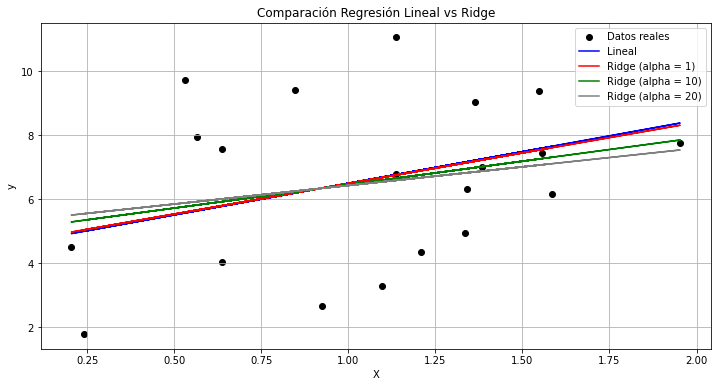

In [10]:

plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred_lr, label='Lineal', color='blue')
plt.plot(X_test, y_pred_ridge_1, label='Ridge (alpha = 1)', color='red')
plt.plot(X_test, y_pred_ridge_10, label='Ridge (alpha = 10)', color='green')
plt.plot(X_test, y_pred_ridge_20, label='Ridge (alpha = 20)', color='gray')
plt.title('Comparación Regresión Lineal vs Ridge')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

> El modelo ridge con alfa = 10, de color verde, es el que mejor se ajusta a los datos

> El modelo lineal y el modelo con alfa = 1 son muy similares.

> De todos los modelos, el rigde con alfa = 20 es el que mas se acerca a una linea horizontal lo que corresponde al efecto de alfas muy grandes.

# Regresion Lasso

Conocida tambien como Regresion por el Operador de Seleccion y Reduccion Absoluta Minima, agrega un termino de regularizacion a la funcion de costo, al igual que ridge, pero utiliza la suma de los valores absolutos de los pesos del modelo (la norma), $\alpha \sum_{i}^{n} \left |{w_{i}} \right |$.

- Este termino tambien se agrega a la funcion de costo durante el entrenamiento y para evaluar el rendimiento del modelo se usa una medida no regularizada.

- Los datos deben escalarse antes de usar lasso para evitar sesgo por diferentes magnitudes.

- El parametro $\alpha$ controla la regularizacion del modelo. Si $\alpha = 0$ se llega a la regresion lineal. Si $\alpha$ es grande muchos pesos se hacen cero lo que ayuda a seleccionar las variables que realmente influyen sobre el modelo.

## Como funciona?

Supongamos que queremos predecir una variable $y$ a partir de dos variables $x_1$ y $x_2$. Contamos con 3 observaciones:

| x₁ | x₂ | y |
| -- | -- | - |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 2 |


Los datos viene modelados por un modelo de regresion lineal:

$$y = w_{1}x_{1} + w_{2}x_{2}$$

Queremos encontrar los valores de $w_{1}$ y $w_{2}$ que minimicen el error cuadratico medio y tambien que minimice el error cuadratico medio con un termino adicional llamado regularizacion Lasso.

El error cuadratico medio del modelo viene dado por:

$$J(w) =  = \sum_{i=1}^{3}(y_i -(w_{1}x_{1i} + x_{2}w_{2i}))^2$$

Mientras que el error cuadratico medio con regularizacion viene dado por:

$$J_{lasso}(w) =  = \sum_{i=1}^{3}(y_i -(w_{1}x_{1i} + x_{2}w_{2i}))^2 + \alpha(\left | w_1\right | + \left | w_2\right |)$$

Expandiendo $J_{lasso}(w)$ obtenemos la funcion que queremos minimizar respecto a $w_1$ y $w_2$.

$$J(w) = (1 - w_{1})^2 + (1 - w_{2})^2 + (2 - w_{1} - w_{2})^2 + \alpha(\left | w_{1}\right | + \left | w_2\right |)$$

Si $\alpha = 0$, llegamos a $J(w)$. Vamos a obtener el minimo para esta ecuacion derivando con respecto a $w_1$ y $w_2$ e igualando a cero:

$$ \frac{\partial J}{\partial w_{1}} = -2(1 - w_1) - 2(2 - w_{1} - w_{2}) = 0$$

$$ \frac{\partial J}{\partial w_{2}} = -2(1 - w_2) - 2(2 - w_{1} - w_{2}) = 0$$

Resolviendo este sistema obtenemos:

$$w_{1} = 1, w_{2} = 1$$

Ahora, probemos que los valores de $w_1$ y $w_2$ se ajustan a los datos datos:

- $y(x_{1}=1, x_{2}= 0) = (1)(1) + (0)(1) = 1$
- $y(x_{1}=0, x_{2}= 1) = (0)(1) + (1)(1) = 1$
- $y(x_{1}=1, x_{2}= 1) = (1)(1) + (1)(1) = 2$

Llegamos a los valores de $y$ dados en la tabla, por tanto, los pesos calculados son los correctos!

Ahora, vamos a minimizar la funcion $J_{lasso}(w)$ para $\alpha = 1$ 

$$J_{lasso}(w) = (1 - w_{1})^2 + (1 - w_{2})^2 + (2 - w_{1} - w_{2})^2 + 1 \cdot(\left | w_{1}\right | + \left | w_2\right |)$$

La tarea de minimizar esta funcion es compleja debido a que los terminos de valor absoluto no son diferenciables en 0. Mediante un algoritmo de optimizacion como Coordinate Descent obtenemos los siguientes valores para los pesos:

$$w_{1} = 0.9$$
$$w_{2} = 0.8, w_{2} = 0$$

El peso $w_2$ puede volverse exactamente 0 dependiendo de la magnitud $\alpha$

En resumen:

> Lasso reduce la magnitud de los coeficientes.

> Puede eliminar variables irrelevantes (haciendo seleccion automatica de caracteristicas).

> Un incremento de $\alpha$ hace que mayor cantidad de coeficientes tiendan a cero.

## Cuando usar Lasso

- Cuando hay muchas variables y no todas son importantes.

- Cuando las variables presentan multicolinealidad, haciendo que lasso tome una de ellas y descarta el resto.

- Cuando el numero de variables es mayor que el numero de observaciones.

- Cuando se busca reducir a cero algunos coeficientes.